In [76]:
# Import Modules
from sklearn import tree
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Perfect Data Set

In [49]:
# Read CSV
data_df = pd.read_csv('Data\Perfect_AviationData.csv') 

# Display DF
data_df

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Number_of_Engines,Engine_Type,Purpose_of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_of_Flight,Report_Status
0,20081126X30503,Accident,WPR09LA046,11/25/2008,"Monterey, CA",United States,36.586944,-121.842777,MRY,Monterey Peninsula Airport,...,1.0,Reciprocating,Personal,0.0,1.0,1.0,0.0,VMC,DESCENT,Probable Cause
1,20081024X13647,Accident,CEN09LA034,10/24/2008,"Breckenridge, TX",United States,32.718889,-98.891111,BKD,Stephens County,...,1.0,Reciprocating,Personal,0.0,2.0,0.0,0.0,VMC,GO-AROUND,Probable Cause
2,20081020X12359,Accident,CEN09LA024,10/19/2008,"Angleton, TX",United States,29.248889,-95.328056,KLBX,Brazoria County Airport,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,APPROACH,Probable Cause
3,20081011X02304,Accident,WPR09LA009,10/10/2008,"Placerville, CA",United States,38.724167,-120.753333,PVF,Placerville Airport,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,GO-AROUND,Probable Cause
4,20081006X90954,Accident,WPR09LA004,10/5/2008,"Sandy Valley, NV",United States,35.795000,-115.627223,3L2,Sky Ranch Airport,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,MANEUVERING,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,20070806X01122,Accident,NYC07LA134,6/8/2007,"Gallatin, TN",United States,36.406667,-86.358889,M33,Sumner County,...,1.0,Reciprocating,Business,0.0,2.0,2.0,0.0,VMC,DESCENT,Probable Cause
119,20070614X00729,Accident,MIA07LA102,5/27/2007,"Hayden, AL",United States,33.925278,-86.870000,NONE,Private,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,LANDING,Probable Cause
120,20070624X00785,Accident,NYC07LA125,5/23/2007,"Leesburg, VA",United States,39.063611,-77.636666,JYO,Leesburg Municipal Airport,...,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,VMC,CRUISE,Probable Cause
121,20070508X00524,Accident,LAX07FA150,5/3/2007,"Dillon, MT",United States,45.253333,-112.548889,DLN,Dillon,...,2.0,Turbo Jet,Personal,2.0,0.0,0.0,0.0,VMC,APPROACH,Probable Cause


In [50]:
# Check for all column names
data_df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Make', 'Model', 'Number_of_Engines',
       'Engine_Type', 'Purpose_of_Flight', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_of_Flight', 'Report_Status'],
      dtype='object')

In [51]:
# Define Target (Also called as Y)
target = data_df["Aircraft_Damage"]
target.head()

0    Substantial
1      Destroyed
2    Substantial
3    Substantial
4    Substantial
Name: Aircraft_Damage, dtype: object

In [52]:
#  Encode Target values for Random Forest Model

## Get the unique list of Severity
unique_target = list(data_df["Aircraft_Damage"].unique())

# Create an encoder and fit on unique values
target_encoder = preprocessing.LabelEncoder()
target_encoder.fit(unique_target)

# Transform all target values with encoder and store as list
ecoded_target_list = list(target_encoder.transform(target))

# Create a final_target with encoded values
encoded_target_df = pd.DataFrame({"Aircraft_Damage" : ecoded_target_list})
final_target = encoded_target_df["Aircraft_Damage"]

# Display encoded target 
final_target

0      2
1      0
2      2
3      2
4      2
      ..
118    2
119    2
120    2
121    0
122    2
Name: Aircraft_Damage, Length: 123, dtype: int64

In [53]:
# Define the input value columns(also called as X)
data = data_df[[
                'Injury_Severity', 'Aircraft_Category', 'Make', 'Total_Fatal_Injuries',
                'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Broad_Phase_of_Flight'
                ]]

# Display data DF
data

,Injury_Severity,Aircraft_Category,Make,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Broad_Phase_of_Flight
0,Non-Fatal,Airplane,PIPER,0.0,1.0,1.0,0.0,DESCENT
1,Non-Fatal,Airplane,Rans,0.0,2.0,0.0,0.0,GO-AROUND
2,Non-Fatal,Airplane,CESSNA,0.0,0.0,0.0,1.0,APPROACH
3,Non-Fatal,Airplane,CESSNA,0.0,0.0,0.0,2.0,GO-AROUND
4,Fatal,Airplane,Bonde,1.0,0.0,0.0,0.0,MANEUVERING
...,...,...,...,...,...,...,...,...
118,Non-Fatal,Airplane,Raytheon Aircraft Company,0.0,2.0,2.0,0.0,DESCENT
119,Fatal,Helicopter,BELL,1.0,0.0,0.0,0.0,LANDING
120,Non-Fatal,Airplane,CESSNA,0.0,0.0,1.0,0.0,CRUISE
121,Fatal,Airplane,CESSNA,2.0,0.0,0.0,0.0,APPROACH


In [54]:
# List of column names which has string values
col_list = ['Injury_Severity', 'Aircraft_Category', 'Make', 'Broad_Phase_of_Flight']

# Iterate through each column in col_list and create a encoded values for that column
for col in col_list:
    # Get the list of unique values from column
    unique = list(data[col].unique())
    
    # Create a LabelEncoder
    encoder = preprocessing.LabelEncoder()
    
    # Store the encoder in unique variable depending on the column name
    if col == 'Injury_Severity':
        le_Injury_Severity = encoder
        
    elif col == 'Aircraft_Category':
        le_Aircraft_Category = encoder
        
    elif col == 'Make':
        le_Make = encoder
        
    elif col == 'Broad_Phase_of_Flight':
        le_Broad_Phase_of_Flight = encoder
        
    # Fit the encoder on unique values 
    encoder.fit(unique)
    
    # Get the column values to list
    col_data_list = data[col].tolist()
    
    # Transform column values to encoded form
    ecoded_list = list(encoder.transform(col_data_list))
    
    # Add encoded values as new column in df
    new_col_name = col+'_Encoded'
    data[new_col_name] = ecoded_list

C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [55]:
# Display DF
data

,Injury_Severity,Aircraft_Category,Make,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Broad_Phase_of_Flight,Injury_Severity_Encoded,Aircraft_Category_Encoded,Make_Encoded,Broad_Phase_of_Flight_Encoded
0,Non-Fatal,Airplane,PIPER,0.0,1.0,1.0,0.0,DESCENT,2,0,40,3
1,Non-Fatal,Airplane,Rans,0.0,2.0,0.0,0.0,GO-AROUND,2,0,42,4
2,Non-Fatal,Airplane,CESSNA,0.0,0.0,0.0,1.0,APPROACH,2,0,14,0
3,Non-Fatal,Airplane,CESSNA,0.0,0.0,0.0,2.0,GO-AROUND,2,0,14,4
4,Fatal,Airplane,Bonde,1.0,0.0,0.0,0.0,MANEUVERING,0,0,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...
118,Non-Fatal,Airplane,Raytheon Aircraft Company,0.0,2.0,2.0,0.0,DESCENT,2,0,43,3
119,Fatal,Helicopter,BELL,1.0,0.0,0.0,0.0,LANDING,0,2,3,5
120,Non-Fatal,Airplane,CESSNA,0.0,0.0,1.0,0.0,CRUISE,2,0,14,2
121,Fatal,Airplane,CESSNA,2.0,0.0,0.0,0.0,APPROACH,0,0,14,0


In [56]:
# Creating final_data df with only required(Numeric value) columns 
final_data = data[[
                'Injury_Severity_Encoded', 'Aircraft_Category_Encoded', 'Make_Encoded', 'Total_Fatal_Injuries',
                'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Broad_Phase_of_Flight_Encoded'
                ]]

# Display Final Data
final_data

,Injury_Severity_Encoded,Aircraft_Category_Encoded,Make_Encoded,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Broad_Phase_of_Flight_Encoded
0,2,0,40,0.0,1.0,1.0,0.0,3
1,2,0,42,0.0,2.0,0.0,0.0,4
2,2,0,14,0.0,0.0,0.0,1.0,0
3,2,0,14,0.0,0.0,0.0,2.0,4
4,0,0,11,1.0,0.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...
118,2,0,43,0.0,2.0,2.0,0.0,3
119,0,2,3,1.0,0.0,0.0,0.0,5
120,2,0,14,0.0,0.0,1.0,0.0,2
121,0,0,14,2.0,0.0,0.0,0.0,0


In [57]:
# Define feature_names to get the important features
feature_names = final_data.columns

# Display feature names
feature_names

Index(['Injury_Severity_Encoded', 'Aircraft_Category_Encoded', 'Make_Encoded',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured',
       'Broad_Phase_of_Flight_Encoded'],
      dtype='object')

##### Logistic_Regression

In [58]:
# Perform train test split for logistic regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data, target, random_state=42)

In [59]:
# Scale data using StandardScalar
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

# Transform X values (Train & Test) with the scalar
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [60]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.5760869565217391
Testing Data Score: 0.2903225806451613


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [61]:
# Run Prediction in test data to get the predicted values for y(target)
y_pred = classifier.predict(X_test)
print(f"First 10 Predictions:   {y_pred[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Destroyed' 'Destroyed' 'Substantial' 'Destroyed' 'Destroyed'
 'Substantial' 'Destroyed' 'Destroyed' 'Destroyed' 'Substantial']
First 10 Actual labels: ['Substantial', 'Substantial', 'Substantial', 'Substantial', 'Substantial', 'Substantial', 'Substantial', 'Substantial', 'Substantial', 'Substantial']


In [62]:
# Create df with predicted and actual values
pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Destroyed,Substantial
1,Destroyed,Substantial
2,Substantial,Substantial
3,Destroyed,Substantial
4,Destroyed,Substantial
5,Substantial,Substantial
6,Destroyed,Substantial
7,Destroyed,Substantial
8,Destroyed,Substantial
9,Substantial,Substantial


In [63]:
# Display Confusion Matrix 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 2  0  1]
 [ 1  1  0]
 [18  2  6]]
Classification Report:
              precision    recall  f1-score   support

   Destroyed       0.10      0.67      0.17         3
       Minor       0.33      0.50      0.40         2
 Substantial       0.86      0.23      0.36        26

   micro avg       0.29      0.29      0.29        31
   macro avg       0.43      0.47      0.31        31
weighted avg       0.75      0.29      0.35        31

Accuracy: 0.2903225806451613


##### Random Forest Regression

In [64]:
# Perform train test split for random forest regression
from sklearn.model_selection import train_test_split
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(final_data, final_target, random_state=42)

In [65]:
# Scale data using StandardScalar
from sklearn.preprocessing import StandardScaler
X_scaler_random = StandardScaler().fit(X_train_random)

# Transform X values (Train & Test) with the scalar
X_train_random_scaled = X_scaler_random.transform(X_train_random)
X_test_random_scaled = X_scaler_random.transform(X_test_random)


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_random_scaled, y_train_random)

print(f"Testing Data Score: {rf.score(X_test_random, y_test_random)}")
print(f"Training Data Score: {rf.score(X_train_random, y_train_random)}")

Testing Data Score: 0.8387096774193549
Training Data Score: 0.7934782608695652


In [67]:
#Run Prediction in test data to get the predicted values for y(target)
y_pred_random = list(rf.predict(X_test_random))
print(f"First 10 Predictions:   {y_pred_random[:10]}")
print(f"First 10 Actual labels: {y_test_random[:10].tolist()}")

First 10 Predictions:   [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
First 10 Actual labels: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [68]:
# Create df with predicted and actual values
pd.DataFrame({"Prediction": y_pred_random, "Actual": y_test_random}).reset_index(drop=True)

,Prediction,Actual
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
5,2,2
6,2,2
7,2,2
8,2,2
9,2,2


In [69]:
# Display Confusion Matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_random = confusion_matrix(y_test_random, y_pred_random)
print("Confusion Matrix:")
print(result_random)
result1_random = classification_report(y_test_random, y_pred_random)
print("Classification Report:",)
print (result1_random)
result2_random = accuracy_score(y_test_random, y_pred_random)
print("Accuracy:",result2_random)

Confusion Matrix:
[[ 0  0  3]
 [ 0  0  2]
 [ 0  0 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         2
           2       0.84      1.00      0.91        26

   micro avg       0.84      0.84      0.84        31
   macro avg       0.28      0.33      0.30        31
weighted avg       0.70      0.84      0.77        31

Accuracy: 0.8387096774193549


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [70]:
# Display Feature names
print(feature_names)

Index(['Injury_Severity_Encoded', 'Aircraft_Category_Encoded', 'Make_Encoded',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured',
       'Broad_Phase_of_Flight_Encoded'],
      dtype='object')


In [71]:
# Get the Important features
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2796228880927114, 'Make_Encoded'),
 (0.2271139234420931, 'Total_Fatal_Injuries'),
 (0.19655117199785746, 'Broad_Phase_of_Flight_Encoded'),
 (0.16243993608297178, 'Injury_Severity_Encoded'),
 (0.050689696629708875, 'Total_Uninjured'),
 (0.04513795146939938, 'Total_Serious_Injuries'),
 (0.032079299833335455, 'Total_Minor_Injuries'),
 (0.006365132451922625, 'Aircraft_Category_Encoded')]

C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


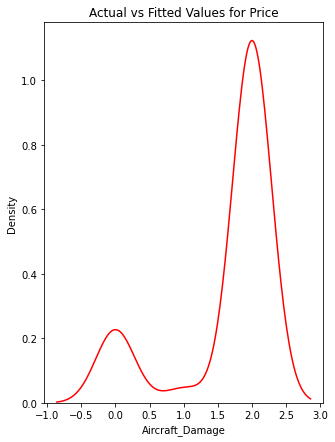

In [77]:
# # For plotting graph need to use the encoded values. 
# # For actual values we have final_target already encoded.

# # # For y_pred, encode using same encoder which was used to encode actual values.
# # encoded_yPred_list = list(target_encoder.transform(y_pred))
# # encoded_yPred_df = pd.DataFrame({"encoded_y_Pred" : encoded_yPred_list})
# # encoded_yPred = encoded_yPred_df["encoded_y_Pred"]

# # print(final_target)
# # print(encoded_yPred)

# plt.figure(figsize=(5, 7))

# ax = sns.distplot(final_target, hist=False, color="r", label="Actual Value")
# sns.distplot(y_pred_random, hist=False, color="b", label="Fitted Values" , ax=ax)


# plt.title('Actual vs Fitted Values for Price')


# plt.show()

##### Data Set with Unknowns

In [26]:
data_df = pd.read_csv('Data\Final_Clean_AviationData_US.csv') 
data_df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Number_of_Engines,Engine_Type,Purpose_of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_of_Flight,Report_Status
0,20200509X11853,Accident,CEN20LA173,5/9/2020,"Haskell, OK",United States,35.864167,-95.655556,2K9,HASKELL,...,0.0,Unknown,Personal,0.0,1.0,0.0,0.0,VMC,DESCENT,Preliminary
1,20200508X55730,Accident,CEN20CA176,5/8/2020,"San Antonio, TX",United States,29.723334,-98.694444,5C1,Unknown,...,0.0,Unknown,Personal,0.0,0.0,0.0,0.0,Unknown,Unknown,Preliminary
2,20200507X60215,Accident,CEN20CA174,5/6/2020,"Gonazales, TX",United States,29.529167,-97.464167,T20,Roger M Dreyer Memorial,...,1.0,Unknown,Personal,0.0,0.0,0.0,2.0,VMC,Unknown,Preliminary
3,20200509X85739,Accident,ERA20CA175,5/3/2020,"Shirley, NY",United States,40.828056,-72.865556,HWV,BROOKHAVEN,...,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,Preliminary
4,20200504X54503,Incident,ENG20IA031,5/3/2020,"Clewiston, FL",United States,26.735000,-81.051111,Unknown,Unknown,...,1.0,Turbo Shaft,Personal,0.0,0.0,0.0,1.0,Unknown,Unknown,Preliminary


In [27]:
# Define Target (Also called as Y)
target = data_df["Aircraft_Damage"]
target.head()

0    Substantial
1    Substantial
2    Substantial
3    Substantial
4        Unknown
Name: Aircraft_Damage, dtype: object

In [28]:
#  Encode Target values for Random Forest Model

## Get the unique list of Severity
unique_target = list(data_df["Aircraft_Damage"].unique())

# Create an encoder and fit on unique values
target_encoder = preprocessing.LabelEncoder()
target_encoder.fit(unique_target)

# Transform all target values with encoder and store as list
ecoded_target_list = list(target_encoder.transform(target))

# Create a final_target with encoded values
encoded_target_df = pd.DataFrame({"Aircraft_Damage" : ecoded_target_list})
final_target = encoded_target_df["Aircraft_Damage"]
final_target

0        2
1        2
2        2
3        2
4        3
        ..
28801    0
28802    0
28803    2
28804    2
28805    0
Name: Aircraft_Damage, Length: 28806, dtype: int64

In [29]:
# Define the input value columns(also called as X)
data = data_df[[
                'Injury_Severity', 'Aircraft_Category', 'Make', 'Total_Fatal_Injuries',
                'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Broad_Phase_of_Flight'
                ]]

# Display data DF
data

,Injury_Severity,Aircraft_Category,Make,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Broad_Phase_of_Flight
0,Non-Fatal,Airplane,Titan,0.0,1.0,0.0,0.0,DESCENT
1,Unavailable,Airplane,North American,0.0,0.0,0.0,0.0,Unknown
2,Non-Fatal,Airplane,CESSNA,0.0,0.0,0.0,2.0,Unknown
3,Non-Fatal,Airplane,Waco,0.0,0.0,0.0,1.0,Unknown
4,Incident,Helicopter,AIRBUS HELICOPTERS,0.0,0.0,0.0,1.0,Unknown
...,...,...,...,...,...,...,...,...
28801,Fatal,Unknown,Cessna,2.0,0.0,0.0,0.0,CRUISE
28802,Fatal,Unknown,Bellanca,2.0,0.0,0.0,0.0,CRUISE
28803,Fatal,Airplane,Beech,1.0,0.0,0.0,0.0,LANDING
28804,Non-Fatal,Airplane,MCDONNELL DOUGLAS,0.0,0.0,1.0,44.0,CLIMB


In [30]:
# List of column names which has string values
col_list = ['Injury_Severity', 'Aircraft_Category', 'Make', 'Broad_Phase_of_Flight']

# Iterate through each column in col_list and create a encoded values for that column
for col in col_list:
    # Get the list of unique values from column
    unique = list(data[col].unique())
    
    # Create a LabelEncoder
    encoder = preprocessing.LabelEncoder()
    
    # Store the encoder in unique variable depending on the column name
    if col == 'Injury_Severity':
        le_Injury_Severity = encoder
        
    elif col == 'Aircraft_Category':
        le_Aircraft_Category = encoder
        
    elif col == 'Make':
        le_Make = encoder
        
    elif col == 'Broad_Phase_of_Flight':
        le_Broad_Phase_of_Flight = encoder
        
    # Fit the encoder on unique values 
    encoder.fit(unique)
    
    # Get the column values to list
    col_data_list = data[col].tolist()
    
    # Transform column values to encoded form
    ecoded_list = list(encoder.transform(col_data_list))
    
    # Add encoded values as new column in df
    new_col_name = col+'_Encoded'
    data[new_col_name] = ecoded_list

C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
# Display DF
data

,Injury_Severity,Aircraft_Category,Make,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Broad_Phase_of_Flight,Injury_Severity_Encoded,Aircraft_Category_Encoded,Make_Encoded,Broad_Phase_of_Flight_Encoded
0,Non-Fatal,Airplane,Titan,0.0,1.0,0.0,0.0,DESCENT,2,0,4359,3
1,Unavailable,Airplane,North American,0.0,0.0,0.0,0.0,Unknown,3,0,3151,12
2,Non-Fatal,Airplane,CESSNA,0.0,0.0,0.0,2.0,Unknown,2,0,806,12
3,Non-Fatal,Airplane,Waco,0.0,0.0,0.0,1.0,Unknown,2,0,4596,12
4,Incident,Helicopter,AIRBUS HELICOPTERS,0.0,0.0,0.0,1.0,Unknown,1,6,68,12
...,...,...,...,...,...,...,...,...,...,...,...,...
28801,Fatal,Unknown,Cessna,2.0,0.0,0.0,0.0,CRUISE,0,11,984,2
28802,Fatal,Unknown,Bellanca,2.0,0.0,0.0,0.0,CRUISE,0,11,647,2
28803,Fatal,Airplane,Beech,1.0,0.0,0.0,0.0,LANDING,0,0,637,5
28804,Non-Fatal,Airplane,MCDONNELL DOUGLAS,0.0,0.0,1.0,44.0,CLIMB,2,0,2747,1


In [32]:
# Creating final_data df with only required(Numeric value) columns 
final_data = data[[
                'Injury_Severity_Encoded', 'Aircraft_Category_Encoded', 'Make_Encoded', 'Total_Fatal_Injuries',
                'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', 'Broad_Phase_of_Flight_Encoded'
                ]]

# Display Final Data
final_data

,Injury_Severity_Encoded,Aircraft_Category_Encoded,Make_Encoded,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Broad_Phase_of_Flight_Encoded
0,2,0,4359,0.0,1.0,0.0,0.0,3
1,3,0,3151,0.0,0.0,0.0,0.0,12
2,2,0,806,0.0,0.0,0.0,2.0,12
3,2,0,4596,0.0,0.0,0.0,1.0,12
4,1,6,68,0.0,0.0,0.0,1.0,12
...,...,...,...,...,...,...,...,...
28801,0,11,984,2.0,0.0,0.0,0.0,2
28802,0,11,647,2.0,0.0,0.0,0.0,2
28803,0,0,637,1.0,0.0,0.0,0.0,5
28804,2,0,2747,0.0,0.0,1.0,44.0,1


In [33]:
# Define feature_names to get the important features
feature_names = final_data.columns

# Display feature names
feature_names

Index(['Injury_Severity_Encoded', 'Aircraft_Category_Encoded', 'Make_Encoded',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured',
       'Broad_Phase_of_Flight_Encoded'],
      dtype='object')

##### Logistic_Regression

In [34]:
# Perform train test split for logistic regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data, target, random_state=42)


In [35]:
# Scale data using StandardScalar
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

# Transform X values (Train & Test) with the scalar
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Data Score: 0.8347991112756897
Testing Data Score: 0.847264648708692


In [37]:
# Run Prediction in test data to get the predicted values for y(target)
y_pred = classifier.predict(X_test)
print(f"First 10 Predictions:   {y_pred[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Substantial' 'Substantial' 'Substantial' 'Substantial' 'Substantial'
 'Substantial' 'Substantial' 'Substantial' 'Substantial' 'Substantial']
First 10 Actual labels: ['Substantial', 'Substantial', 'Substantial', 'Destroyed', 'Substantial', 'Substantial', 'Substantial', 'Substantial', 'Substantial', 'Substantial']


In [38]:
# Create df with predicted and actual values
pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Substantial,Substantial
1,Substantial,Substantial
2,Substantial,Substantial
3,Substantial,Destroyed
4,Substantial,Substantial
...,...,...
7197,Substantial,Substantial
7198,Substantial,Substantial
7199,Substantial,Substantial
7200,Substantial,Substantial


In [39]:
# Display Confusion Matrix 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[   1    0  796    0]
 [   0    9  139    4]
 [   0   11 6085    3]
 [   0    9  138    7]]
Classification Report:
              precision    recall  f1-score   support

   Destroyed       1.00      0.00      0.00       797
       Minor       0.31      0.06      0.10       152
 Substantial       0.85      1.00      0.92      6099
     Unknown       0.50      0.05      0.08       154

   micro avg       0.85      0.85      0.85      7202
   macro avg       0.67      0.28      0.28      7202
weighted avg       0.85      0.85      0.78      7202

Accuracy: 0.847264648708692


##### Random Forest Regression

In [40]:
# Perform train test split for random forest regression
from sklearn.model_selection import train_test_split
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(final_data, final_target, random_state=42)

In [41]:
# Scale data using StandardScalar
from sklearn.preprocessing import StandardScaler
X_scaler_random = StandardScaler().fit(X_train_random)

# Transform X values (Train & Test) with the scalar
X_train_random_scaled = X_scaler_random.transform(X_train_random)
X_test_random_scaled = X_scaler_random.transform(X_test_random)


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_random_scaled, y_train_random)

print(f"Testing Data Score: {rf.score(X_test_random, y_test_random)}")
print(f"Training Data Score: {rf.score(X_train_random, y_train_random)}")

Testing Data Score: 0.849902804776451
Training Data Score: 0.8355397148676171


In [43]:
#Run Prediction in test data to get the predicted values for y(target)
y_pred_random = list(rf.predict(X_test_random))
print(f"First 10 Predictions:   {y_pred_random[:10]}")
print(f"First 10 Actual labels: {y_test_random[:10].tolist()}")

First 10 Predictions:   [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
First 10 Actual labels: [2, 2, 2, 0, 2, 2, 2, 2, 2, 2]


In [44]:
# Create df with predicted and actual values
pd.DataFrame({"Prediction": y_pred_random, "Actual": y_test_random}).reset_index(drop=True)

,Prediction,Actual
0,2,2
1,2,2
2,2,2
3,2,0
4,2,2
...,...,...
7197,2,2
7198,2,2
7199,2,2
7200,2,2


In [45]:
# Decode actial & predicted values back to the original state

In [46]:
# Display Confusion Matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_random = confusion_matrix(y_test_random, y_pred_random)
print("Confusion Matrix:")
print(result_random)
result1_random = classification_report(y_test_random, y_pred_random)
print("Classification Report:",)
print (result1_random)
result2_random = accuracy_score(y_test_random, y_pred_random)
print("Accuracy:",result2_random)

Confusion Matrix:
[[   0    0  796    1]
 [   0    0  131   21]
 [   0    0 6037   62]
 [   0    0   70   84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       797
           1       0.00      0.00      0.00       152
           2       0.86      0.99      0.92      6099
           3       0.50      0.55      0.52       154

   micro avg       0.85      0.85      0.85      7202
   macro avg       0.34      0.38      0.36      7202
weighted avg       0.74      0.85      0.79      7202

Accuracy: 0.849902804776451


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
# Display Feature names
print(feature_names)

Index(['Injury_Severity_Encoded', 'Aircraft_Category_Encoded', 'Make_Encoded',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured',
       'Broad_Phase_of_Flight_Encoded'],
      dtype='object')


In [48]:
# Get the Important features
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.29977913225009856, 'Make_Encoded'),
 (0.2058771634007361, 'Injury_Severity_Encoded'),
 (0.14020004516082374, 'Total_Fatal_Injuries'),
 (0.1268792605823637, 'Total_Uninjured'),
 (0.09424773198939906, 'Broad_Phase_of_Flight_Encoded'),
 (0.05574253495339786, 'Aircraft_Category_Encoded'),
 (0.04793479369452957, 'Total_Serious_Injuries'),
 (0.02933933796865126, 'Total_Minor_Injuries')]